In [1]:
import numpy as np
from scipy.special import roots_legendre, gamma, roots_hermite, roots_laguerre
import matplotlib.pyplot as plt

## Zadanie 1

In [2]:
# Funkcja podcałkowa
def f1(x):
    return 1 / (4 * x**2 + 1)

# Dokładna wartość całki
def exact_integral(a, x):
    return (1 / (2 * a)) * np.log(a**2 * x**2 + 1)

# Obliczanie wartości całki metodą Gaussa-Legendre'a
def gauss_legendre_integration(n):
    x, w = roots_legendre(n)
    a, b = 0, 2
    t = 0.5 * (x + 1) * (b - a) + a
    integral = np.sum(w * f1(t)) * 0.5 * (b - a)
    return integral, w

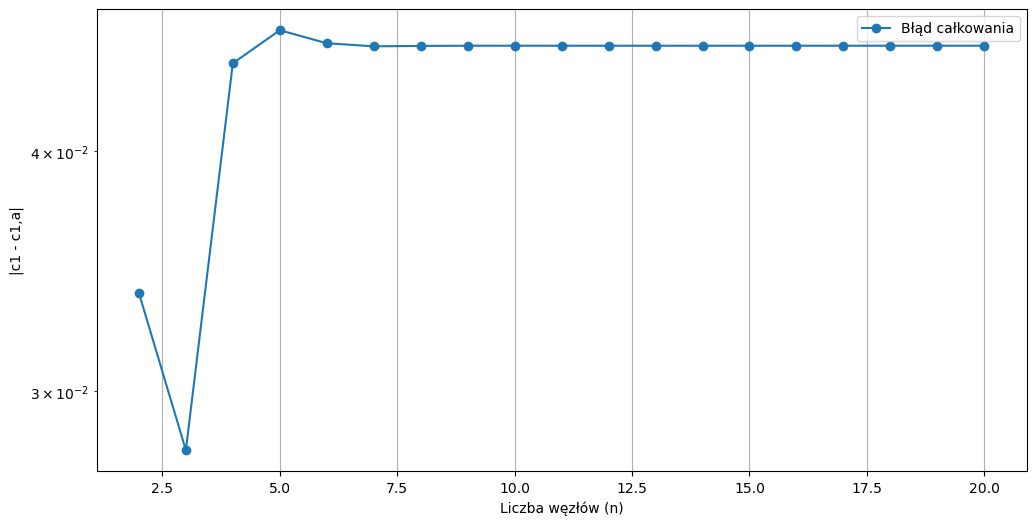

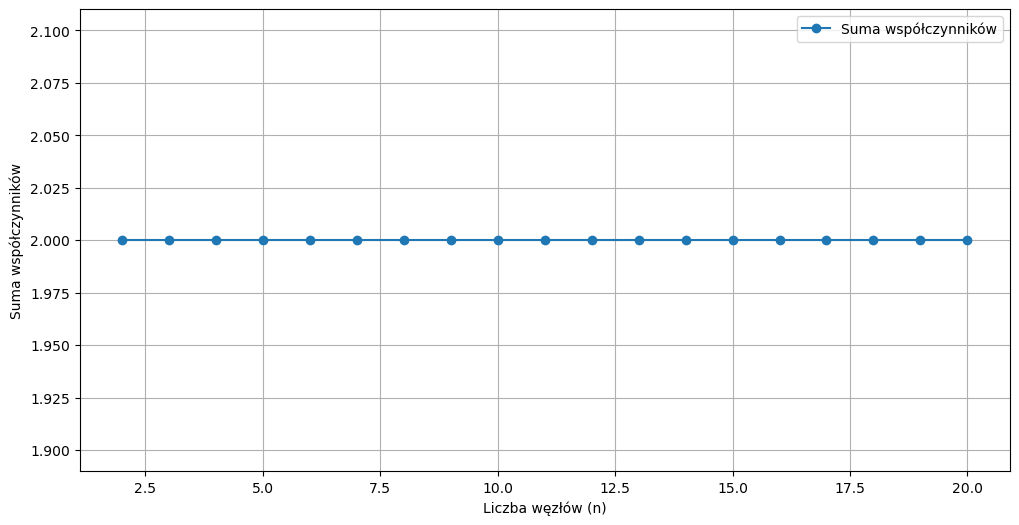

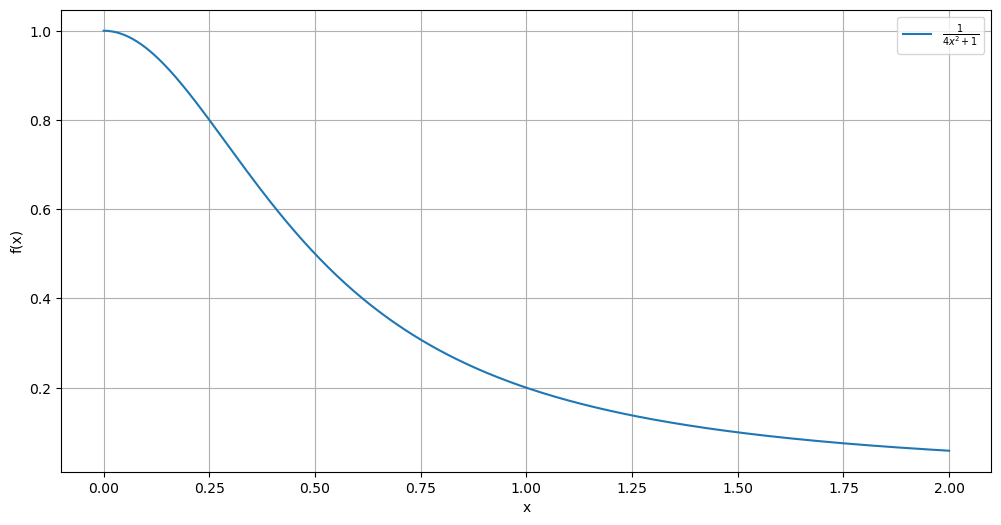

In [3]:
# Parametry do dokładnej wartości całki
a = 2
c1_a = exact_integral(a, 2) - exact_integral(a, 0)

n_values = np.arange(2, 21)
errors = []
sum_weights = []

for n in n_values:
    numerical_integral, weights = gauss_legendre_integration(n)
    errors.append(np.abs(numerical_integral - c1_a))
    sum_weights.append(np.sum(weights))

# Wykres błędu całkowania
plt.figure(figsize=(12, 6))
plt.plot(n_values, errors, marker='o', label='Błąd całkowania')
plt.yscale('log')
plt.xlabel('Liczba węzłów (n)')
plt.ylabel('|c1 - c1,a|')
# plt.title('Błąd całkowania dla kwadratury Gaussa-Legendre\'a')
plt.legend()
plt.grid(True)
plt.show()

# Wykres sumy współczynników kwadratury
plt.figure(figsize=(12, 6))
plt.plot(n_values, sum_weights, marker='o', label='Suma współczynników')
plt.xlabel('Liczba węzłów (n)')
plt.ylabel('Suma współczynników')
# plt.title('Suma współczynników kwadratury Gaussa-Legendre\'a')
plt.legend()
plt.grid(True)
plt.show()

# Wykres funkcji podcałkowej
x_values = np.linspace(0, 2, 400)
y_values = f1(x_values)

plt.figure(figsize=(12, 6))
plt.plot(x_values, y_values, label=r'$\frac{1}{4x^2 + 1}$')
plt.xlabel('x')
plt.ylabel('f(x)')
# plt.title('Wykres funkcji podcałkowej')
plt.legend()
plt.grid(True)
plt.show()

## Zadanie 2

In [4]:
# Funkcja podcałkowa
def f2(x, k):
    return x**k * np.exp(-x)

# Dokładna wartość całki
def exact_integral(k):
    return gamma(k + 1)  # gamma(k+1) = k!

# Obliczanie wartości całki metodą Gaussa-Laguerre'a
def gauss_laguerre_integration(n, k):
    x, w = roots_laguerre(n)
    integral = np.sum(w * f2(x, k))
    return integral, w

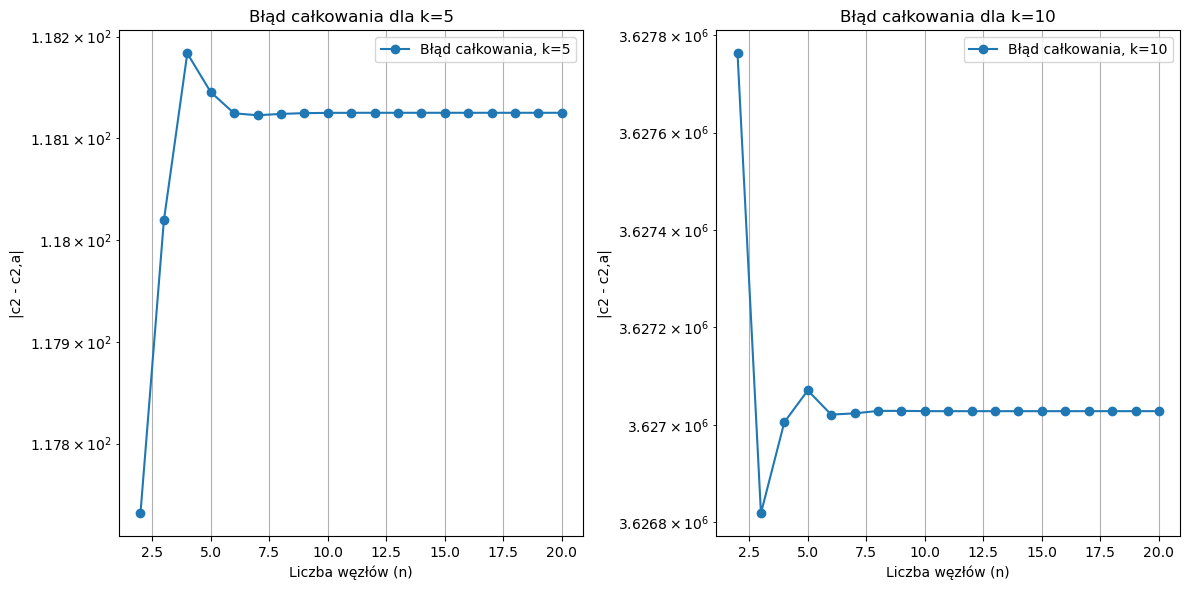

In [5]:
# Parametry do dokładnej wartości całki
k_values = [5, 10]
n_values = np.arange(2, 21)
errors_k5 = []
errors_k10 = []
sum_weights_k5 = []
sum_weights_k10 = []

# Obliczenia dla k = 5
for n in n_values:
    numerical_integral, weights = gauss_laguerre_integration(n, 5)
    errors_k5.append(np.abs(numerical_integral - exact_integral(5)))
    sum_weights_k5.append(np.sum(weights))

# Obliczenia dla k = 10
for n in n_values:
    numerical_integral, weights = gauss_laguerre_integration(n, 10)
    errors_k10.append(np.abs(numerical_integral - exact_integral(10)))
    sum_weights_k10.append(np.sum(weights))

# Wykresy błędów całkowania dla k = 5 i k = 10
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(n_values, errors_k5, marker='o', label='Błąd całkowania, k=5')
plt.yscale('log')
plt.xlabel('Liczba węzłów (n)')
plt.ylabel('|c2 - c2,a|')
plt.title('Błąd całkowania dla k=5')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(n_values, errors_k10, marker='o', label='Błąd całkowania, k=10')
plt.yscale('log')
plt.xlabel('Liczba węzłów (n)')
plt.ylabel('|c2 - c2,a|')
plt.title('Błąd całkowania dla k=10')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

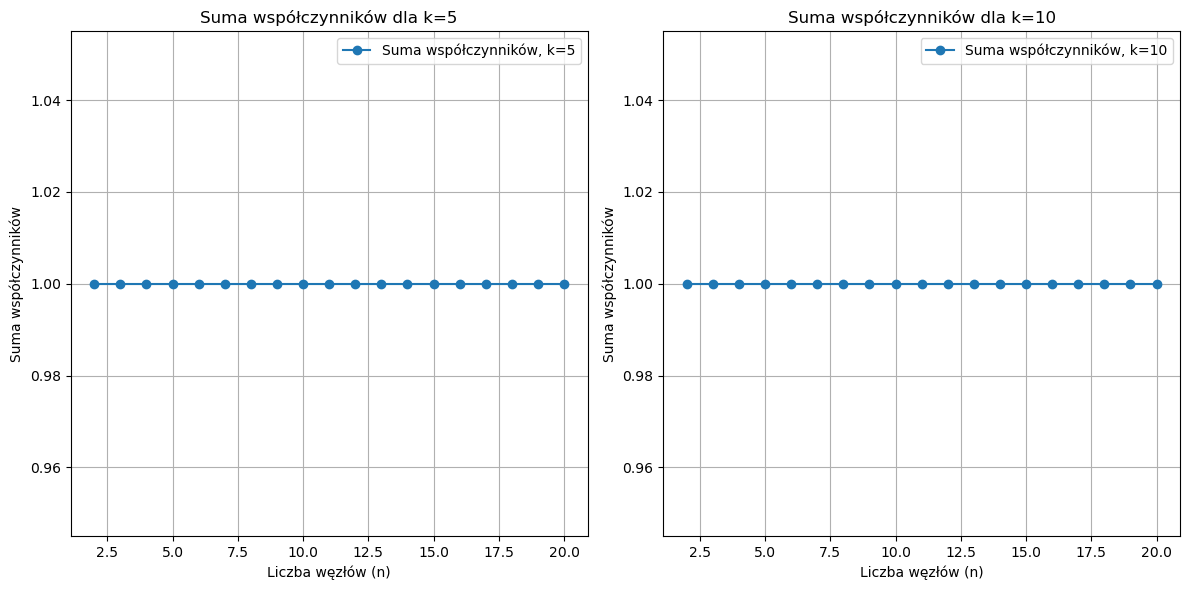

In [6]:
# Wykresy sumy współczynników kwadratury dla k = 5 i k = 10
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(n_values, sum_weights_k5, marker='o', label='Suma współczynników, k=5')
plt.xlabel('Liczba węzłów (n)')
plt.ylabel('Suma współczynników')
plt.title('Suma współczynników dla k=5')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(n_values, sum_weights_k10, marker='o', label='Suma współczynników, k=10')
plt.xlabel('Liczba węzłów (n)')
plt.ylabel('Suma współczynników')
plt.title('Suma współczynników dla k=10')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

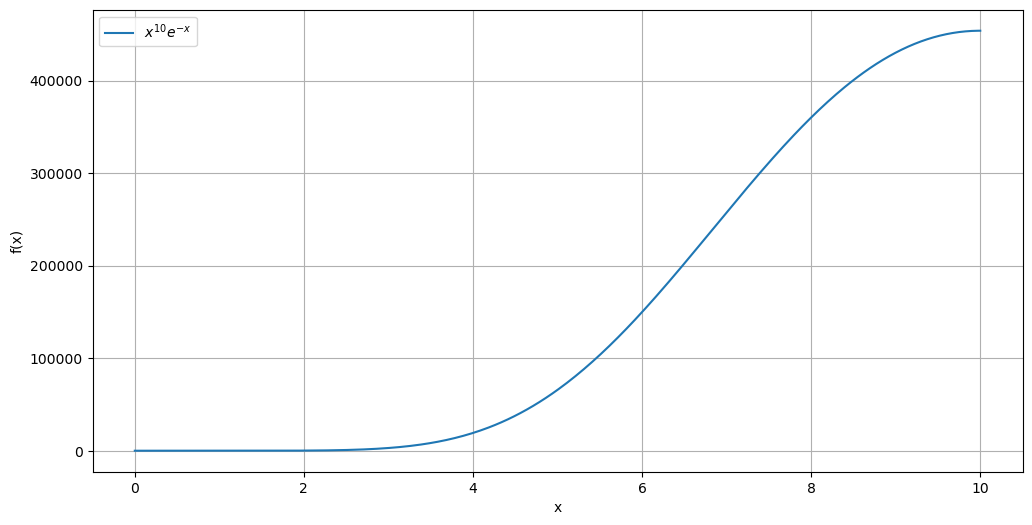

In [7]:
# Wykres funkcji podcałkowej dla k = 10
x_values = np.linspace(0, 10, 400)
y_values = f2(x_values, 10)

plt.figure(figsize=(12, 6))
plt.plot(x_values, y_values, label=r'$x^{10} e^{-x}$')
plt.xlabel('x')
plt.ylabel('f(x)')
# plt.title('Wykres funkcji podcałkowej dla k=10')
plt.legend()
plt.grid(True)
plt.show()

## Zadanie 3

In [8]:
# Funkcja podcałkowa
def f3(x, y):
    return np.sin(x)**2 * np.sin(y)**4 * np.exp(-x**2 - y**2)

# Dokładna wartość całki
cdok = 0.1919832644

# Obliczanie wartości całki metodą Gaussa-Hermite'a
def gauss_hermite_integration(n):
    x, w = roots_hermite(n)
    integral = 0.0
    for i in range(n):
        for j in range(n):
            integral += w[i] * w[j] * f3(x[i], x[j])
    return integral

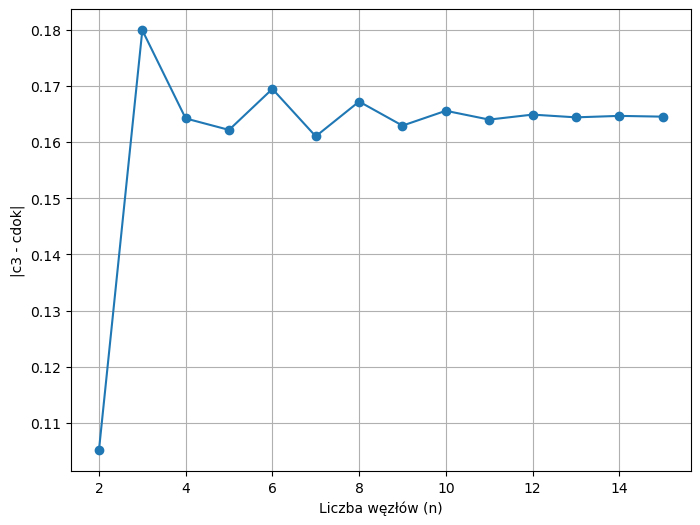

In [9]:
# Obliczenia dla różnych wartości n
n_values = np.arange(2, 16)
errors = []

for n in n_values:
    numerical_integral = gauss_hermite_integration(n)
    errors.append(np.abs(numerical_integral - cdok))

# Wykres błędu całkowania
plt.figure(figsize=(8, 6))
plt.plot(n_values, errors, marker='o')
plt.xlabel('Liczba węzłów (n)')
plt.ylabel('|c3 - cdok|')
# plt.title('Błąd całkowania dla kwadratury Gaussa-Hermite\'a')
plt.grid(True)
plt.show()